# Assignment 2: Convolutional Autoencoders

Britt Schmitz  - i6235053 <br>
Tabea Heusel - i6323791

## 0 Setup

### 0.1 Imports

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### 0.2 Loading Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
X = np.append(x_train, x_test, axis=0)
y = np.append(y_train, y_test, axis=0)

## 1 Autoencoder Network Implementation

### 1.1 Train, Validation, and Test 

In [3]:
# normalize
X = X / 255

# create train, validation, and test splits
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=3)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=3)

### 1.2 Autoencoder Network

In [4]:
def create_cae():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(8, 3, 1, "same", activation="relu", input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(12, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(16, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(12, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(3, 3, 1, "same", activation="relu"))
    
    return model

Epoch 1/50
1500/1500 [==============================] - 104s 68ms/step - loss: 0.6311 - accuracy: 0.3816 - val_loss: 0.6559 - val_accuracy: 0.3893
Epoch 2/50
1500/1500 [==============================] - 89s 59ms/step - loss: 0.6064 - accuracy: 0.4021 - val_loss: 0.5948 - val_accuracy: 0.3663
Epoch 3/50
1500/1500 [==============================] - 88s 58ms/step - loss: 0.5968 - accuracy: 0.4175 - val_loss: 0.5908 - val_accuracy: 0.4126
Epoch 4/50
1500/1500 [==============================] - 88s 58ms/step - loss: 0.5903 - accuracy: 0.4251 - val_loss: 0.5879 - val_accuracy: 0.4162
Epoch 5/50
1500/1500 [==============================] - 82s 55ms/step - loss: 0.5872 - accuracy: 0.4277 - val_loss: 0.5860 - val_accuracy: 0.4232
Epoch 6/50
1500/1500 [==============================] - 86s 58ms/step - loss: 0.5861 - accuracy: 0.4309 - val_loss: 0.5849 - val_accuracy: 0.4271
Epoch 7/50
1500/1500 [==============================] - 83s 55ms/step - loss: 0.5855 - accuracy: 0.4319 - val_loss: 0.5839 

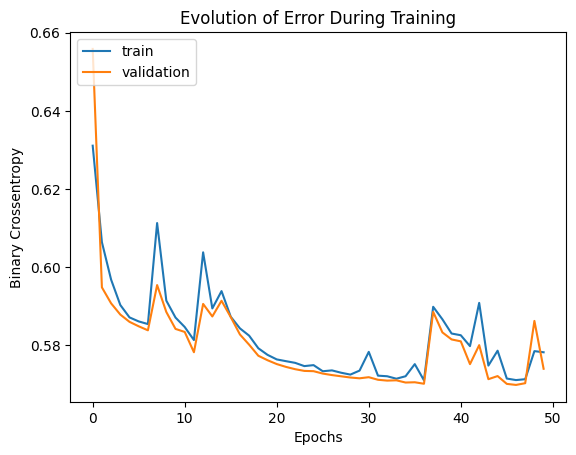

In [5]:
network = create_cae()
network.compile(optimizer="sgd", loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
history = network.fit(X_train, X_train, epochs=50, validation_data=(X_val, X_val))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.title('Evolution of Error During Training')
plt.legend(['train', 'validation'], loc='upper left')

In [6]:
results = network.evaluate(X_test, X_test)
print(f"Test accuracy: {results[1]} \nTest error : {results[0]}")

188/188 [==============================] - 3s 14ms/step - loss: 0.5735 - accuracy: 0.5800
Test accuracy: 0.5800215005874634 
Test error : 0.5734931826591492


188/188 [==============================] - 3s 13ms/step


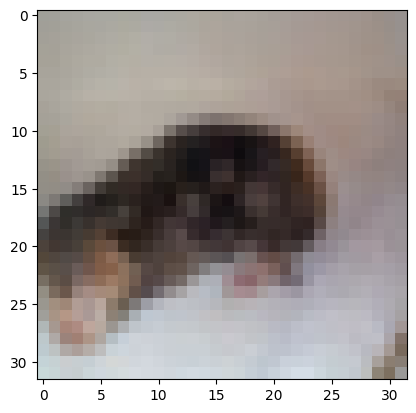

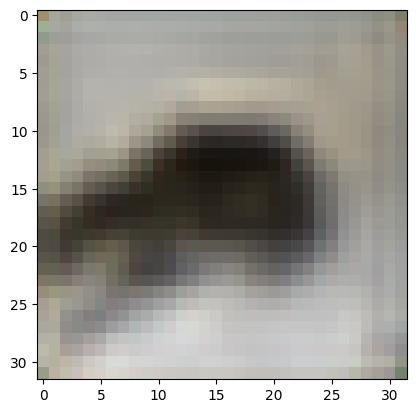

In [7]:
predictions = network.predict(X_test)

plt.imshow(X_test[0])
plt.show()
plt.imshow(predictions[0])
plt.show()

## 2 Latent Space Representations

### 2.1 Latent Space Size of Previous Network

In [8]:
def compute_latent_space_size(w, k, p, s, c):
    num = w - k + 2 * p
    frac = num / s
    square = (frac + 1) ** 2
    result = square * c
    
    return result

In [9]:
w = 8
k = 3
p = 1
s = 1
c = 16

print(compute_latent_space_size(w, k, p, s, c))

1024.0


### 2.2 Correlation Between Latent Space Representation and Error

In [10]:
def create_cae_fewer_layers():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(8, 3, 1, "same", activation="relu", input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(16, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(3, 3, 1, "same", activation="relu"))
    
    return model

In [11]:
def create_cae_more_channels():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(16, 3, 1, "same", activation="relu", input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(24, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(32, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(24, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(3, 3, 1, "same", activation="relu"))
    
    return model

In [12]:
def create_cae_fewer_channels():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(4, 3, 1, "same", activation="relu", input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(6, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(8, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(6, 3, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(3, 3, 1, "same", activation="relu"))
    
    return model

In [13]:
def create_cae_bigger_filter():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(8, 5, 1, "same", activation="relu", input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(12, 5, 1, "same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(16, 5, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(12, 5, 1, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(3, 5, 1, "same", activation="relu"))
    
    return model

In [14]:
def create_cae_bigger_stride():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(8, 3, 2, "same", activation="relu", input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(12, 3, 2, "same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(2, padding="same"))
    model.add(tf.keras.layers.Conv2D(16, 3, 2, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(12, 3, 2, "same", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(2))
    model.add(tf.keras.layers.Conv2D(3, 3, 2, "same", activation="relu"))
    
    return model

In [15]:
def create_cae_valid_padding():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(8, 3, 1, "valid", activation="relu", input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPool2D(2, padding="valid"))
    model.add(tf.keras.layers.Conv2D(12, 3, 1, "valid", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(2, padding="valid"))
    model.add(tf.keras.layers.Conv2D(16, 3, 1, "valid", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(3))
    model.add(tf.keras.layers.Conv2D(12, 3, 1, "valid", activation="relu"))
    model.add(tf.keras.layers.UpSampling2D(4))
    model.add(tf.keras.layers.Conv2D(3, 3, 1, "valid", activation="relu"))
    
    return model

In [19]:
def experiment(model, model_name):
    print(f"Experimenting with {model_name} model: \n")
    model.compile(optimizer="sgd", loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
    history = model.fit(X_train, X_train, epochs=50, validation_data=(X_val, X_val))
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Binary Crossentropy')
    plt.title('Evolution of Error During Training')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    results = model.evaluate(X_test, X_test)
    print(f"Test accuracy: {results[1]} \nTest error : {results[0]}")
    
    predictions = model.predict(X_test)
    plt.imshow(X_test[0])
    plt.show()
    plt.imshow(predictions[0])
    plt.show()

Experimenting with fewer layers model: 
Epoch 1/50
1500/1500 [==============================] - 96s 63ms/step - loss: 0.5898 - accuracy: 0.5237 - val_loss: 0.5724 - val_accuracy: 0.6032
Epoch 2/50
1500/1500 [==============================] - 82s 55ms/step - loss: 0.5693 - accuracy: 0.6426 - val_loss: 0.5659 - val_accuracy: 0.6668
Epoch 3/50
1500/1500 [==============================] - 74s 49ms/step - loss: 0.5655 - accuracy: 0.6738 - val_loss: 0.5640 - val_accuracy: 0.6933
Epoch 4/50
1500/1500 [==============================] - 86s 57ms/step - loss: 0.5645 - accuracy: 0.6935 - val_loss: 0.5627 - val_accuracy: 0.7021
Epoch 5/50
1500/1500 [==============================] - 111s 74ms/step - loss: 0.5684 - accuracy: 0.6974 - val_loss: 0.5636 - val_accuracy: 0.7094
Epoch 6/50
1500/1500 [==============================] - 89s 59ms/step - loss: 0.5640 - accuracy: 0.7144 - val_loss: 0.5617 - val_accuracy: 0.7313
Epoch 7/50
1500/1500 [==============================] - 78s 52ms/step - loss: 0.562

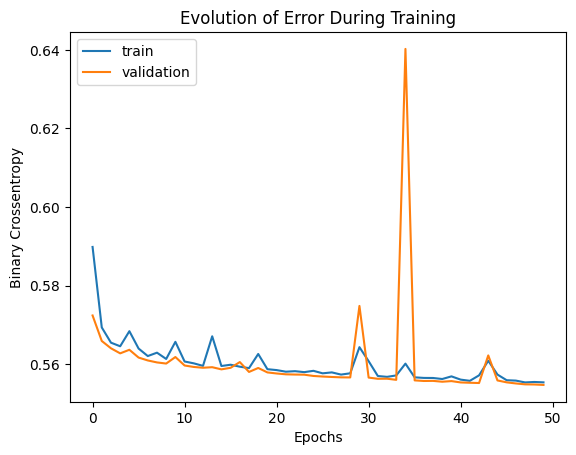

188/188 [==============================] - 3s 13ms/step - loss: 0.5735 - accuracy: 0.5800
Test accuracy: 0.5800215005874634 
Test error : 0.5734931826591492
188/188 [==============================] - 2s 13ms/step


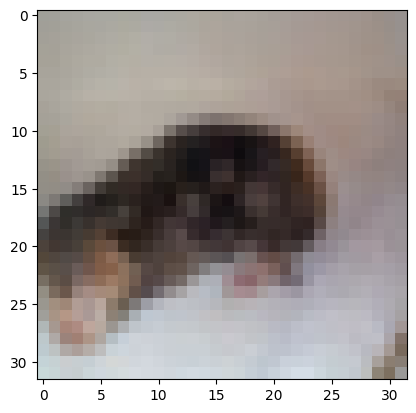

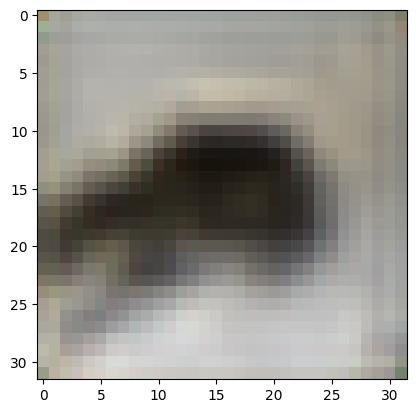

Experimenting with more channels model: 
Epoch 1/50
1500/1500 [==============================] - 115s 76ms/step - loss: 0.6357 - accuracy: 0.4327 - val_loss: 0.6123 - val_accuracy: 0.4577
Epoch 2/50
1500/1500 [==============================] - 112s 75ms/step - loss: 0.5928 - accuracy: 0.5285 - val_loss: 0.5856 - val_accuracy: 0.5833
Epoch 3/50
1500/1500 [==============================] - 112s 75ms/step - loss: 0.5837 - accuracy: 0.5950 - val_loss: 0.5804 - val_accuracy: 0.6057
Epoch 4/50
1500/1500 [==============================] - 114s 76ms/step - loss: 0.6072 - accuracy: 0.4328 - val_loss: 0.5928 - val_accuracy: 0.4367
Epoch 5/50
1500/1500 [==============================] - 114s 76ms/step - loss: 0.5938 - accuracy: 0.4276 - val_loss: 0.5880 - val_accuracy: 0.4426
Epoch 6/50
1500/1500 [==============================] - 114s 76ms/step - loss: 0.5878 - accuracy: 0.4607 - val_loss: 0.5881 - val_accuracy: 0.4702
Epoch 7/50
1500/1500 [==============================] - 113s 76ms/step - loss

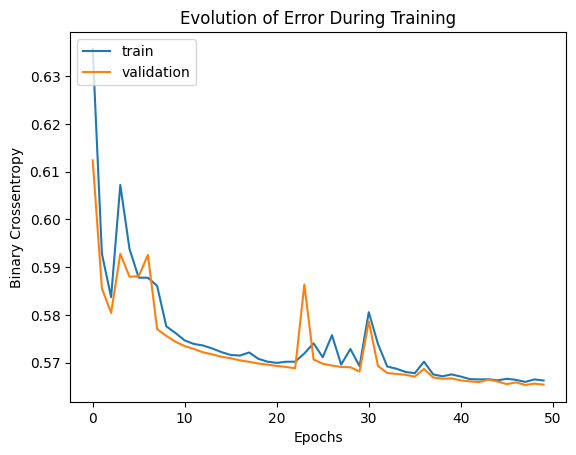

188/188 [==============================] - 2s 10ms/step - loss: 0.5735 - accuracy: 0.5800
Test accuracy: 0.5800215005874634 
Test error : 0.5734931826591492
188/188 [==============================] - 2s 11ms/step


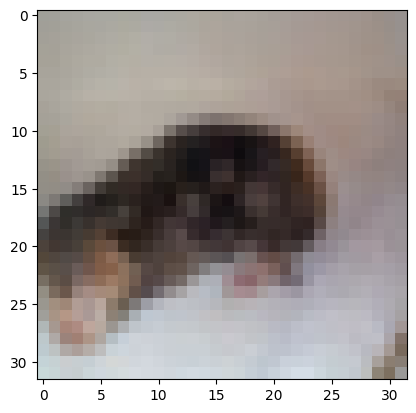

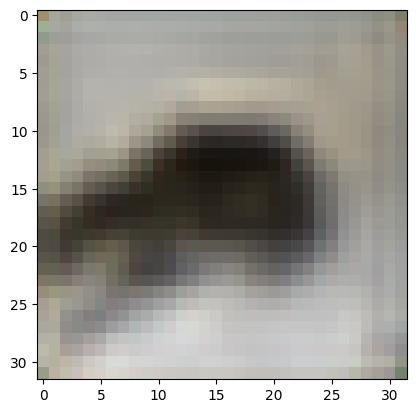

Experimenting with fewer channels model: 
Epoch 1/50
1500/1500 [==============================] - 64s 42ms/step - loss: 2.7737 - accuracy: 0.2588 - val_loss: 0.6165 - val_accuracy: 0.4359
Epoch 2/50
1500/1500 [==============================] - 63s 42ms/step - loss: 0.6033 - accuracy: 0.4549 - val_loss: 0.5972 - val_accuracy: 0.4525
Epoch 3/50
1500/1500 [==============================] - 63s 42ms/step - loss: 0.5962 - accuracy: 0.4446 - val_loss: 0.5931 - val_accuracy: 0.4409
Epoch 4/50
1500/1500 [==============================] - 64s 43ms/step - loss: 0.5959 - accuracy: 0.4366 - val_loss: 0.5913 - val_accuracy: 0.4359
Epoch 5/50
1500/1500 [==============================] - 63s 42ms/step - loss: 0.5903 - accuracy: 0.4349 - val_loss: 0.5891 - val_accuracy: 0.4261
Epoch 6/50
1500/1500 [==============================] - 63s 42ms/step - loss: 0.5894 - accuracy: 0.4332 - val_loss: 0.5880 - val_accuracy: 0.4287
Epoch 7/50
1500/1500 [==============================] - 63s 42ms/step - loss: 0.58

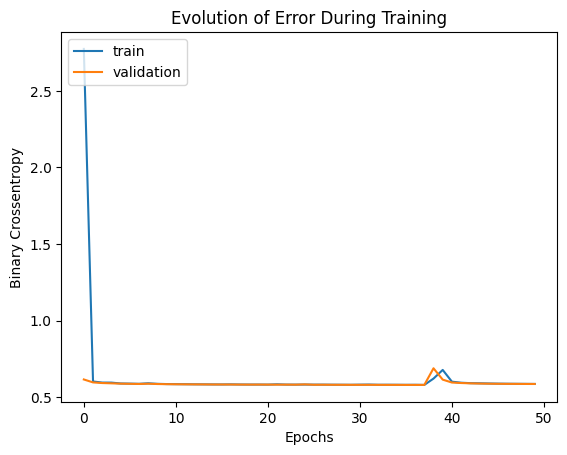

188/188 [==============================] - 2s 13ms/step - loss: 0.5735 - accuracy: 0.5800
Test accuracy: 0.5800215005874634 
Test error : 0.5734931826591492
188/188 [==============================] - 2s 11ms/step


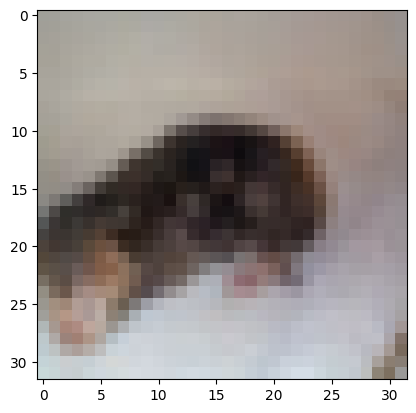

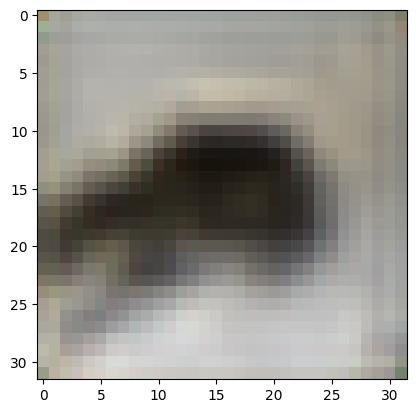

Experimenting with bigger filter model: 
Epoch 1/50
1500/1500 [==============================] - 157s 104ms/step - loss: 0.6478 - accuracy: 0.3898 - val_loss: 0.6088 - val_accuracy: 0.4243
Epoch 2/50
1500/1500 [==============================] - 156s 104ms/step - loss: 0.6173 - accuracy: 0.3945 - val_loss: 0.6242 - val_accuracy: 0.3324
Epoch 3/50
1500/1500 [==============================] - 157s 105ms/step - loss: 0.6123 - accuracy: 0.3857 - val_loss: 0.5975 - val_accuracy: 0.4000
Epoch 4/50
1500/1500 [==============================] - 162s 108ms/step - loss: 0.6877 - accuracy: 0.4844 - val_loss: 0.6909 - val_accuracy: 0.5094
Epoch 5/50
1500/1500 [==============================] - 155s 103ms/step - loss: 0.6552 - accuracy: 0.4712 - val_loss: 0.5985 - val_accuracy: 0.4357
Epoch 6/50
1500/1500 [==============================] - 157s 105ms/step - loss: 0.5956 - accuracy: 0.4327 - val_loss: 0.5917 - val_accuracy: 0.4367
Epoch 7/50
1500/1500 [==============================] - 156s 104ms/step

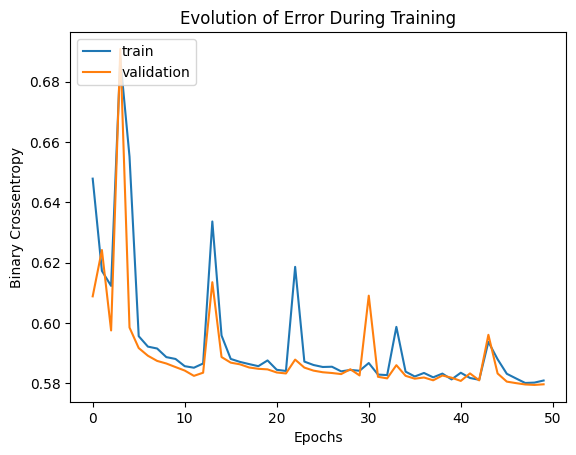

188/188 [==============================] - 3s 15ms/step - loss: 0.5735 - accuracy: 0.5800
Test accuracy: 0.5800215005874634 
Test error : 0.5734931826591492
188/188 [==============================] - 3s 14ms/step


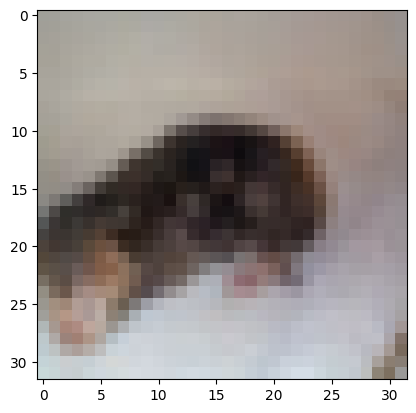

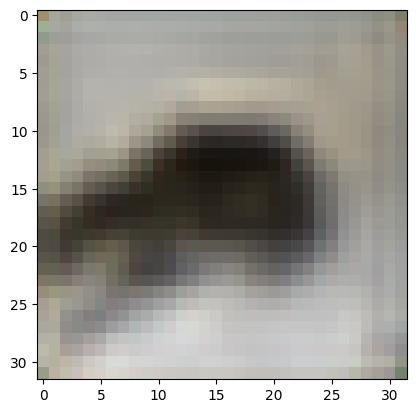

Experimenting with bigger stride model: 
Epoch 1/50
1500/1500 [==============================] - 21s 13ms/step - loss: 0.6788 - accuracy: 0.3917 - val_loss: 0.6643 - val_accuracy: 0.4174
Epoch 2/50
1500/1500 [==============================] - 19s 13ms/step - loss: 0.6608 - accuracy: 0.4477 - val_loss: 0.6586 - val_accuracy: 0.4900
Epoch 3/50
1500/1500 [==============================] - 19s 13ms/step - loss: 0.6578 - accuracy: 0.5387 - val_loss: 0.6570 - val_accuracy: 0.5496
Epoch 4/50
1500/1500 [==============================] - 19s 12ms/step - loss: 0.6569 - accuracy: 0.5615 - val_loss: 0.6564 - val_accuracy: 0.5526
Epoch 5/50
1500/1500 [==============================] - 19s 13ms/step - loss: 0.6564 - accuracy: 0.5692 - val_loss: 0.6561 - val_accuracy: 0.5735
Epoch 6/50
1500/1500 [==============================] - 19s 13ms/step - loss: 0.6561 - accuracy: 0.5737 - val_loss: 0.6560 - val_accuracy: 0.5777
Epoch 7/50
1500/1500 [==============================] - 19s 13ms/step - loss: 0.655

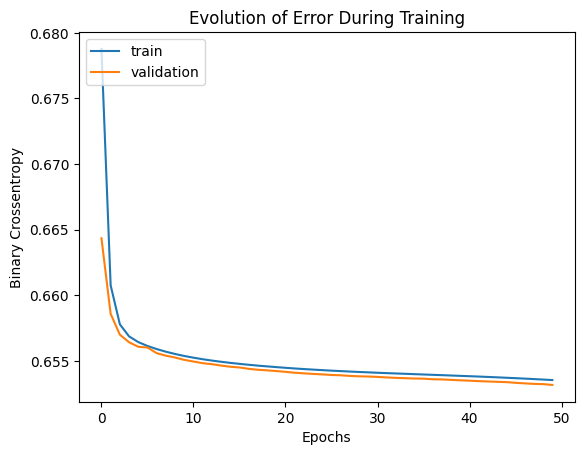

188/188 [==============================] - 2s 13ms/step - loss: 0.5735 - accuracy: 0.5800
Test accuracy: 0.5800215005874634 
Test error : 0.5734931826591492
188/188 [==============================] - 2s 12ms/step


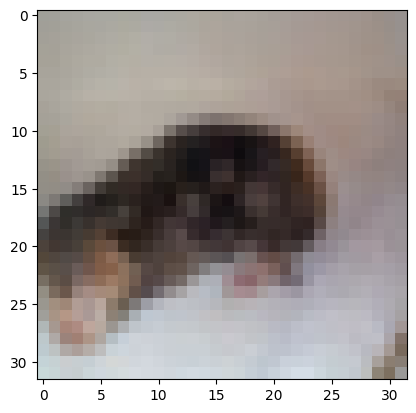

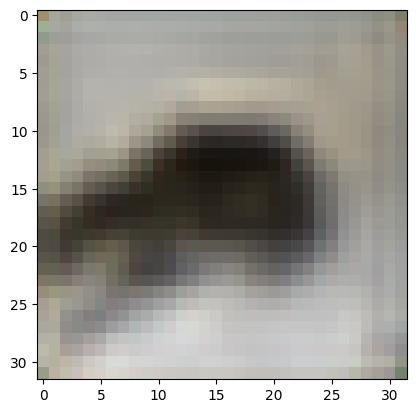

In [20]:
models = [create_cae_fewer_layers(), 
          create_cae_more_channels(),
          create_cae_fewer_channels(),
          create_cae_bigger_filter(),
          create_cae_bigger_stride(),
#          create_cae_valid_padding()
          ]

model_names = ["fewer layers",
               "more channels",
               "fewer channels",
               "bigger filter",
               "bigger stride",
#               "different padding"
               ]

for i in range(0, len(models)):
    experiment(models[i], model_names[i])

In [18]:
print(f"Latent space sizes: \n"
      f"- Fewer Layer: {compute_latent_space_size(16, 3, 1, 1, 16)} \n"
      f"- More Channels: {compute_latent_space_size(8, 3, 1, 1, 32)} \n"
      f"- Fewer Channels: {compute_latent_space_size(8, 3, 1, 1, 8)} \n"
      f"- Bigger Filter: {compute_latent_space_size(8, 5, 1, 1, 16)} \n"
      f"- Bigger Stride: {compute_latent_space_size(2, 3, 1, 2, 16)} \n")

Latent space sizes: 
- Fewer Layer: 4096.0 
- More Channels: 2048.0 
- Fewer Channels: 512.0 
- Bigger Filter: 576.0 
- Bigger Stride: 36.0 


# 3 Colorization of images
